# 소비지수는 해당 지역 확진자 수, 전체 확진자 수 중 어떤것에 더 영향을 받을까?
<br>

## 전체 평균 소비지수 그래프

https://dacon.io/codeshare/1339?dtype=recent<br>
앞선 팀의 데이터분석에 의하면 코로나 확진 이후로 전체 평균 소비지수가 감소<br>
소비지수가 월에 따라 차이를 보이므로 (주로 여름에 높음) 월을 기준으로 다시 그려본다<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 품목 별 소비지수 데이터
index = pd.read_csv('index.csv')

index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595


In [3]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127525 entries, 0 to 127524
Data columns (total 8 columns):
period     127525 non-null int64
catl       127525 non-null object
catm       127525 non-null object
age        127525 non-null object
gender     127525 non-null object
sido       127525 non-null object
sigungu    127525 non-null object
cgi        127525 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.8+ MB


In [4]:
index['period'] = index['period'].astype(str)

index['year'] = index['period'].apply(lambda x:x[:4])
index['month'] = index['period'].apply(lambda x:x[-2:])
index.head()

,period,catl,catm,age,gender,sido,sigungu,cgi,year,month
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642,2019,01
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454,2019,01
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847,2019,01
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726,2019,01
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595,2019,01


In [5]:
index.loc[index['catl']=='건강/의료용품',:].catm.unique()

array(['건강관리용품'], dtype=object)

In [6]:
index.loc[index['catl']=='식품',:].catm.unique()

array(['가공식품', '기호식품', '담배', '빙과류', '빵류', '신선식품', '유제품류', '음료', '제과류',
       '주류'], dtype=object)

In [7]:
index.loc[index['catl']=='일용품',:].catm.unique()

array(['생활용품', '애완동물용품'], dtype=object)

In [8]:
index.loc[index['catl']=='화장품',:].catm.unique()

array(['기타화장품', '바디/헤어용품', '뷰티소품', '화장품'], dtype=object)

In [9]:
plotdata = index.loc[index['gender']=='all',:].groupby(['period','catl']).cgi.mean().reset_index();plotdata.head()

,period,catl,cgi
0,201901,건강/의료용품,97.595914
1,201901,식품,105.915141
2,201901,일용품,96.802299
3,201901,화장품,98.382188
4,201902,건강/의료용품,98.277844


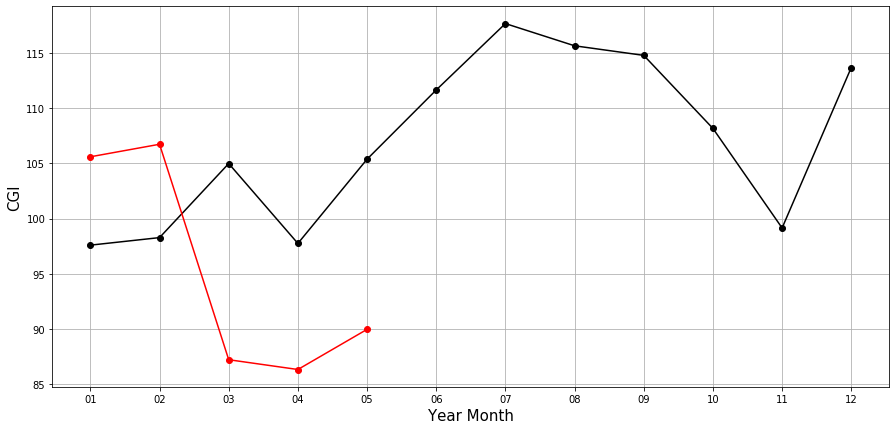

In [10]:
import matplotlib.pyplot as plt 
import matplotlib.legend as legend

plt.figure(figsize=(15,7))

a = plotdata.loc[plotdata['catl']=='건강/의료용품',:]
a['year'] = a['period'].apply(lambda x:x[:4])
#c.loc['year',:] = c.loc['period',:].apply(lambda x:x[:4])

a1 = a.loc[a['year']=='2019',:]
a1['month'] = a1['period'].apply(lambda x:x[-2:])
plt.plot(a1['month'],a1['cgi'],'ko-')

a2 = a.loc[a['year']=='2020',:]
a2['month'] = a2['period'].apply(lambda x:x[-2:])
plt.plot(a2['month'],a2['cgi'],'ro-')

#print(a2['cgi'].loc[a2['month']=='01'])

plt.ylabel('CGI',fontsize=15) 
plt.xlabel("Year Month",fontsize=15) 

plt.grid(True) 
plt.show()

저 빨간 상자가 안없어져요ㅠㅠ

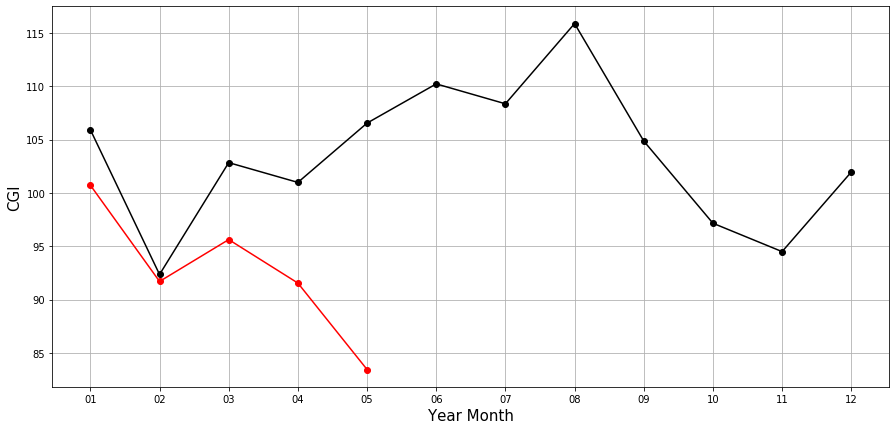

In [11]:
plt.figure(figsize=(15,7))

b = plotdata.loc[plotdata['catl']=='식품',:]
b['year'] = b['period'].apply(lambda x:x[:4])
#c.loc['year',:] = c.loc['period',:].apply(lambda x:x[:4])

b1 = b.loc[b['year']=='2019',:]
b1['month'] = b1['period'].apply(lambda x:x[-2:])
plt.plot(b1['month'],b1['cgi'],'ko-')


b2 = b.loc[b['year']=='2020',:]
b2['month'] = b2['period'].apply(lambda x:x[-2:])
plt.plot(b2['month'],b2['cgi'],'ro-')

plt.ylabel('CGI',fontsize=15) 
plt.xlabel("Year Month",fontsize=15) 

plt.grid(True) 
plt.show()

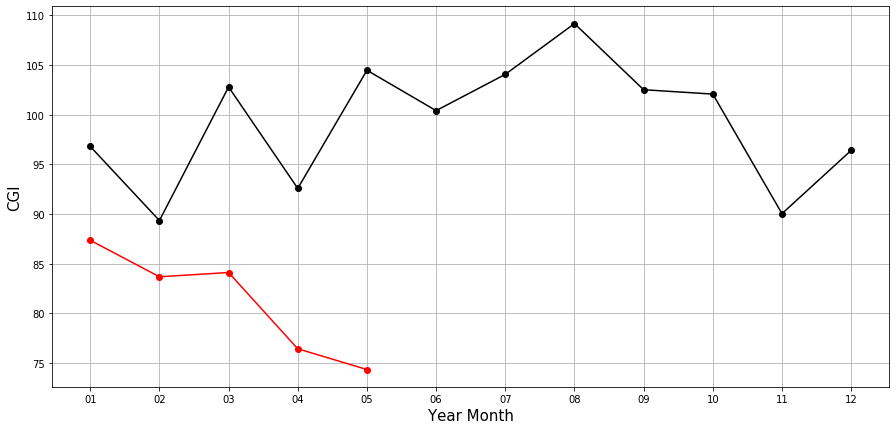

In [12]:
plt.figure(figsize=(15,7))

c = plotdata.loc[plotdata['catl']=='일용품',:]
c['year'] = c['period'].apply(lambda x:x[:4])
#c.loc['year',:] = c.loc['period',:].apply(lambda x:x[:4])

c1 = c.loc[c['year']=='2019',:]
c1['month'] =c1['period'].apply(lambda x:x[-2:])
plt.plot(c1['month'],c1['cgi'],'ko-')


c2 = c.loc[c['year']=='2020',:]
c2['month'] = c2['period'].apply(lambda x:x[-2:])
plt.plot(c2['month'],c2['cgi'],'ro-')

plt.ylabel('CGI',fontsize=15) 
plt.xlabel("Year Month",fontsize=15) 

plt.grid(True) 
plt.show()

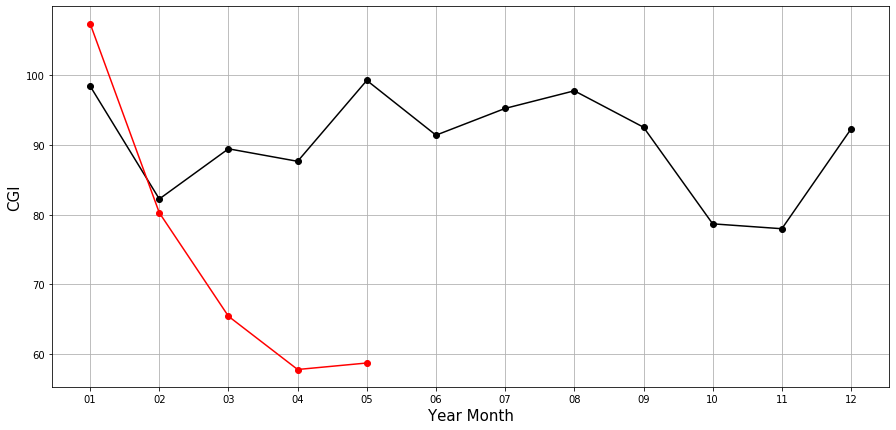

In [13]:
plt.figure(figsize=(15,7))

d = plotdata.loc[plotdata['catl']=='화장품',:]
d['year'] = d['period'].apply(lambda x:x[:4])
#c.loc['year',:] = c.loc['period',:].apply(lambda x:x[:4])

d1 = d.loc[d['year']=='2019',:]
d1['month'] = d1['period'].apply(lambda x:x[-2:])
plt.plot(d1['month'],d1['cgi'],'ko-')


d2 = d.loc[d['year']=='2020',:]
d2['month'] = d2['period'].apply(lambda x:x[-2:])
plt.plot(d2['month'],d2['cgi'],'ro-')

plt.ylabel('CGI',fontsize=15) 
plt.xlabel("Year Month",fontsize=15) 

plt.grid(True) 
plt.show()

전 품목에 대해서 1월 이후로 소비지수가 감소함<br>
서울의 소비지수는 해당 지역 확진자 수에 영향을 많이 받을까?<br>
아니면 전체 확진자 수에 영향을 많이 받을까?

## 전국 확진자 수와 서울의 소비지수의 상관관계 시각화

In [14]:
#from urllib2 import Request, urlopen
#from urllib import urlencode, quote_plus

#url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
#queryParams = '?' + urlencode({ quote_plus('ServiceKey') : '서비스키', quote_plus('ServiceKey') : '-', quote_plus('pageNo') : '1', quote_plus('numOfRows') : '10', quote_plus('startCreateDt') : '20200410', quote_plus('endCreateDt') : '20200410' })

#request = Request(url + queryParams)
#request.get_method = lambda: 'GET'
#response_body = urlopen(request).read()
#print (response_body)

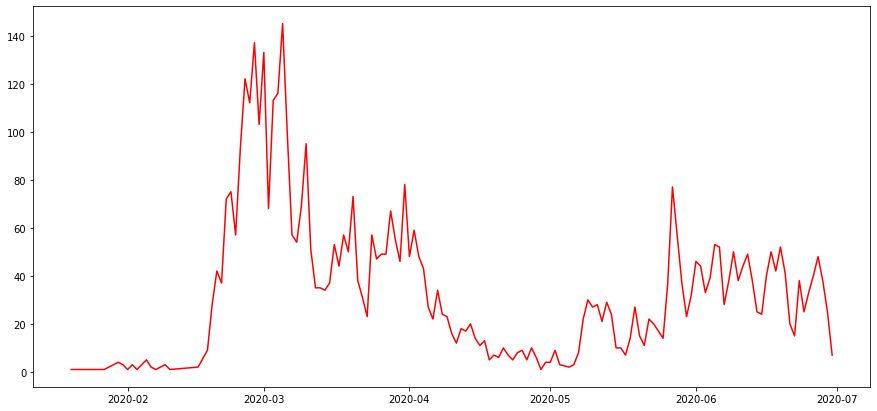

In [15]:
# 코로나 환자 데이터
patientinfo = pd.read_csv('PatientInfo.csv')

plt.figure(figsize=(15,7))

patientcount = patientinfo.groupby(['confirmed_date']).size().reset_index(name='count')
patientcount['confirmed_date'] = pd.to_datetime(patientcount['confirmed_date'], format='%Y-%m-%d')

plt.plot(patientcount['confirmed_date'] ,patientcount['count'] ,'r-')

우선 건강/의료용품에 대해서

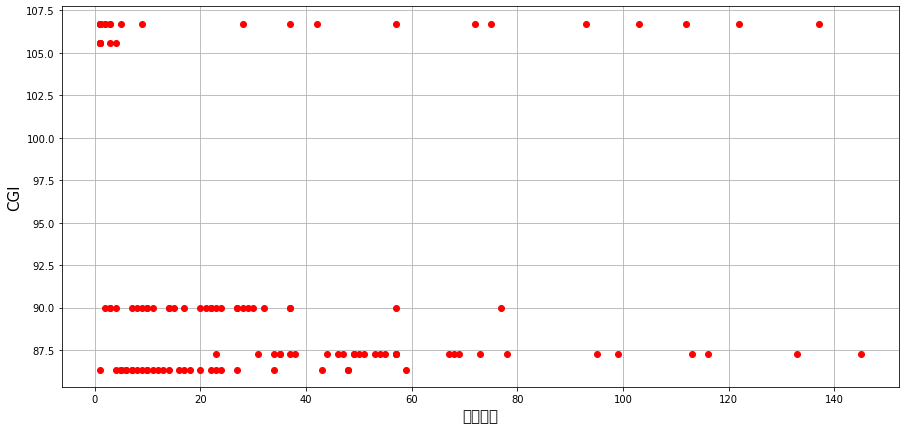

In [16]:
plt.figure(figsize=(15,7))


patientcount["month"] = patientcount["confirmed_date"].dt.month

patient1 = patientcount.loc[patientcount['month']==1]
i1 = a2['cgi'].loc[a2['month']=='01']
cgi1 = [i1[48]]*6
plt.plot(patient1['count'],cgi1,'ro')

patient2 = patientcount.loc[patientcount['month']==2]
i2 = a2['cgi'].loc[a2['month']=='02']
cgi2 = [i2[52]]*21
plt.plot(patient2['count'],cgi2,'ro')

patient3 = patientcount.loc[patientcount['month']==3]
i3 = a2['cgi'].loc[a2['month']=='03']
cgi3 = [i3[56]]*31
plt.plot(patient3['count'],cgi3,'ro')

patient4 = patientcount.loc[patientcount['month']==4]
i4 = a2['cgi'].loc[a2['month']=='04']
cgi4 = [i4[60]]*30
plt.plot(patient4['count'],cgi4,'ro')

patient5 = patientcount.loc[patientcount['month']==5]
i5 = a2['cgi'].loc[a2['month']=='05']
cgi5 = [i5[64]]*30
plt.plot(patient5['count'],cgi5,'ro')
    
    
plt.ylabel('CGI',fontsize=15) 
plt.xlabel("확진자수",fontsize=15)

plt.grid(True) 
plt.show()   

띠용

cgi 데이터가 월 별로 나와있어서 나올 수 있는 cgi가 제한적 <br>
-> cgi를 지역별로 평균내지 않고 각각 점으로 찍어보자

In [17]:
data = index.loc[index['gender']=='all',:].groupby(['period','catl','sigungu']).cgi.mean().reset_index();data.head()

,period,catl,sigungu,cgi
0,201901,건강/의료용품,all,93.652646
1,201901,건강/의료용품,강남구,85.927268
2,201901,건강/의료용품,강동구,106.197471
3,201901,건강/의료용품,강북구,132.907095
4,201901,건강/의료용품,강서구,89.823328


In [18]:
aa = data.loc[data['catl']=='건강/의료용품',:]
aa['year'] = aa['period'].apply(lambda x:x[:4])
#aa.loc['year',:]= aa['period'].apply(lambda x:x[:4])

aa2 = aa.loc[aa['year']=='2020',:]
aa2['month'] = aa2['period'].apply(lambda x:x[-2:])
#aa2.loc['month',:]=aa2['period'].apply(lambda x:x[-2:])

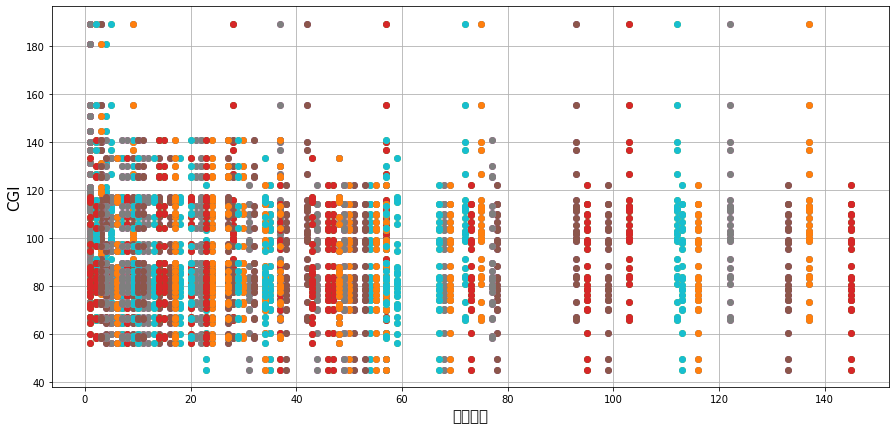

In [19]:
plt.figure(figsize=(15,7))


patientcount["month"] = patientcount["confirmed_date"].dt.month

patient1 = patientcount.loc[patientcount['month']==1]
ii1 = aa2['cgi'].loc[aa2['month']=='01'].reset_index()

for x in patient1['count']:
    patient = [x]*26
    for y in ii1:
        plt.plot(patient,ii1['cgi'],'o')
      
    
    
patient2 = patientcount.loc[patientcount['month']==2]
ii2 = aa2['cgi'].loc[aa2['month']=='02'].reset_index()

for x in patient2['count']:
    patient = [x]*26
    for y in ii2:
        plt.plot(patient,ii2['cgi'],'o')     
        
        
patient3 = patientcount.loc[patientcount['month']==3]
ii3 = aa2['cgi'].loc[aa2['month']=='03'].reset_index()

for x in patient3['count']:
    patient = [x]*26
    for y in ii3:
        plt.plot(patient,ii3['cgi'],'o')     
                
patient4 = patientcount.loc[patientcount['month']==4]
ii4 = aa2['cgi'].loc[aa2['month']=='04'].reset_index()

for x in patient4['count']:
    patient = [x]*26
    for y in ii4:
        plt.plot(patient,ii4['cgi'],'o')        
    
        
patient5 = patientcount.loc[patientcount['month']==5]
ii5 = aa2['cgi'].loc[aa2['month']=='05'].reset_index()

for x in patient5['count']:
    patient = [x]*26
    for y in ii5:
        plt.plot(patient,ii5['cgi'],'o')        
            
        

    
plt.ylabel('CGI',fontsize=15) 
plt.xlabel("확진자수",fontsize=15)

plt.grid(True) 
plt.show()   

반비례..?! <br>
뚜렷하게 보이지는 않는다

화장품이 차이가 컸으므로 화장품 데이터로 해보기

In [20]:
aa = data.loc[data['catl']=='화장품',:]
aa['year'] = aa['period'].apply(lambda x:x[:4])
#aa.loc['year',:]= aa['period'].apply(lambda x:x[:4])

aa2 = aa.loc[aa['year']=='2020',:]
aa2['month'] = aa2['period'].apply(lambda x:x[-2:])
#aa2.loc['month',:]=aa2['period'].apply(lambda x:x[-2:])

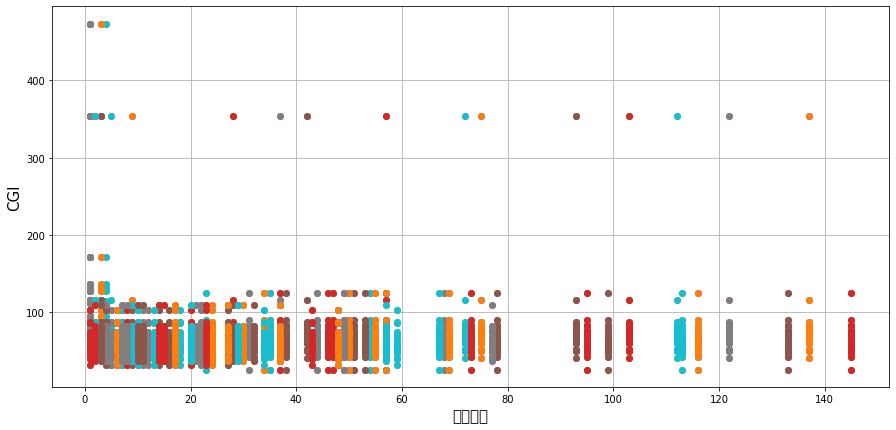

In [21]:
plt.figure(figsize=(15,7))


patientcount["month"] = patientcount["confirmed_date"].dt.month

patient1 = patientcount.loc[patientcount['month']==1]
ii1 = aa2['cgi'].loc[aa2['month']=='01'].reset_index()

for x in patient1['count']:
    patient = [x]*26
    for y in ii1:
        plt.plot(patient,ii1['cgi'],'o')
      
    
    
patient2 = patientcount.loc[patientcount['month']==2]
ii2 = aa2['cgi'].loc[aa2['month']=='02'].reset_index()

for x in patient2['count']:
    patient = [x]*26
    for y in ii2:
        plt.plot(patient,ii2['cgi'],'o')     
        
        
patient3 = patientcount.loc[patientcount['month']==3]
ii3 = aa2['cgi'].loc[aa2['month']=='03'].reset_index()

for x in patient3['count']:
    patient = [x]*26
    for y in ii3:
        plt.plot(patient,ii3['cgi'],'o')     
                
patient4 = patientcount.loc[patientcount['month']==4]
ii4 = aa2['cgi'].loc[aa2['month']=='04'].reset_index()

for x in patient4['count']:
    patient = [x]*26
    for y in ii4:
        plt.plot(patient,ii4['cgi'],'o')        
    
        
patient5 = patientcount.loc[patientcount['month']==5]
ii5 = aa2['cgi'].loc[aa2['month']=='05'].reset_index()

for x in patient5['count']:
    patient = [x]*26
    for y in ii5:
        plt.plot(patient,ii5['cgi'],'o')        
            
        

    
plt.ylabel('CGI',fontsize=15) 
plt.xlabel("확진자수",fontsize=15)

plt.grid(True) 
plt.show()   

## 서울 확진자 수와 서울의 소비지수의 상관관계 시각화

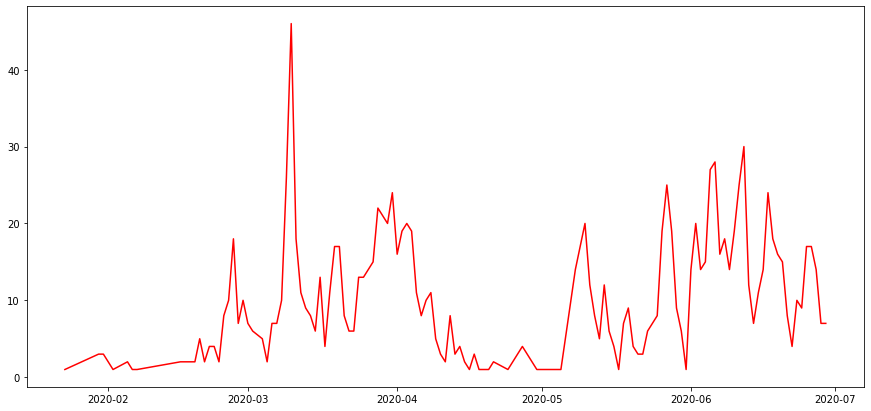

In [22]:
patientinfo = pd.read_csv('PatientInfo.csv')
plt.figure(figsize=(15,7))

patientseoul = patientinfo[patientinfo['province'] == '서울']

patientseoul = patientseoul.groupby(['confirmed_date']).size().reset_index(name='count')
patientseoul['confirmed_date'] = pd.to_datetime(patientseoul['confirmed_date'], format='%Y-%m-%d')


plt.plot(patientseoul['confirmed_date'] ,patientseoul['count'] ,'r-')

In [23]:
plt.figure(figsize=(15,7))

patientseoul["month"] = patientseoul["confirmed_date"].dt.month
aa = data.loc[data['catl']=='건강/의료용품',:]
aa['year'] = aa['period'].apply(lambda x:x[:4])
#aa.loc['year',:]= aa['period'].apply(lambda x:x[:4])

aa2 = aa.loc[aa['year']=='2020',:]
aa2['month'] = aa2['period'].apply(lambda x:x[-2:])
#aa2.loc['month',:]=aa2['period'].apply(lambda x:x[-2:])


<Figure size 1080x504 with 0 Axes>

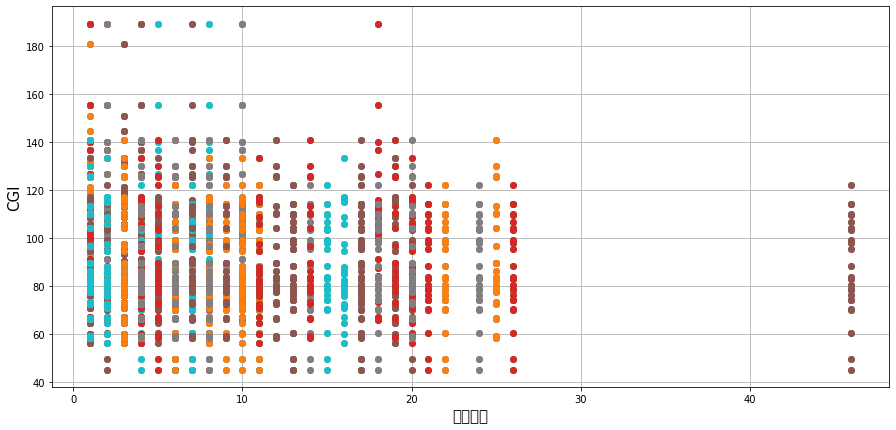

In [24]:
plt.figure(figsize=(15,7))

patient1 = patientseoul.loc[patientseoul['month']==1]

ii1 = aa2['cgi'].loc[aa2['month']=='01'].reset_index()
for x in patient1['count']:
    patient = [x]*26
    for y in ii1:
        plt.plot(patient,ii1['cgi'],'o')
  
patient2 = patientseoul.loc[patientseoul['month']==2]

ii2 = aa2['cgi'].loc[aa2['month']=='02'].reset_index()
for x in patient2['count']:
    patient = [x]*26
    for y in ii2:
        plt.plot(patient,ii2['cgi'],'o')


patient3 = patientseoul.loc[patientseoul['month']==3]

ii3 = aa2['cgi'].loc[aa2['month']=='03'].reset_index()
for x in patient3['count']:
    patient = [x]*26
    for y in ii3:
        plt.plot(patient,ii3['cgi'],'o')
        
        
patient4 = patientseoul.loc[patientseoul['month']==4]

ii4 = aa2['cgi'].loc[aa2['month']=='04'].reset_index()
for x in patient4['count']:
    patient = [x]*26
    for y in ii4:
        plt.plot(patient,ii4['cgi'],'o')

patient5 = patientseoul.loc[patientseoul['month']==5]

ii5 = aa2['cgi'].loc[aa2['month']=='05'].reset_index()
for x in patient5['count']:
    patient = [x]*26
    for y in ii5:
        plt.plot(patient,ii5['cgi'],'o')
        
        
        

    
plt.ylabel('CGI',fontsize=15) 
plt.xlabel("확진자수",fontsize=15)

plt.grid(True) 
plt.show() 

In [25]:
plt.figure(figsize=(15,7))

patientseoul["month"] = patientseoul["confirmed_date"].dt.month
aa = data.loc[data['catl']=='화장품',:]
aa['year'] = aa['period'].apply(lambda x:x[:4])
#aa.loc['year',:]= aa['period'].apply(lambda x:x[:4])

aa2 = aa.loc[aa['year']=='2020',:]
aa2['month'] = aa2['period'].apply(lambda x:x[-2:])
#aa2.loc['month',:]=aa2['period'].apply(lambda x:x[-2:])

<Figure size 1080x504 with 0 Axes>

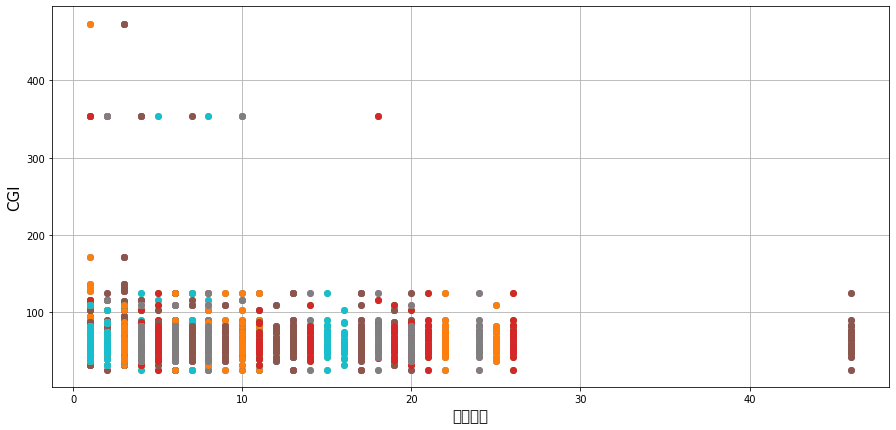

In [26]:
plt.figure(figsize=(15,7))

patient1 = patientseoul.loc[patientseoul['month']==1]

ii1 = aa2['cgi'].loc[aa2['month']=='01'].reset_index()
for x in patient1['count']:
    patient = [x]*26
    for y in ii1:
        plt.plot(patient,ii1['cgi'],'o')
  
patient2 = patientseoul.loc[patientseoul['month']==2]

ii2 = aa2['cgi'].loc[aa2['month']=='02'].reset_index()
for x in patient2['count']:
    patient = [x]*26
    for y in ii2:
        plt.plot(patient,ii2['cgi'],'o')


patient3 = patientseoul.loc[patientseoul['month']==3]

ii3 = aa2['cgi'].loc[aa2['month']=='03'].reset_index()
for x in patient3['count']:
    patient = [x]*26
    for y in ii3:
        plt.plot(patient,ii3['cgi'],'o')
        
        
patient4 = patientseoul.loc[patientseoul['month']==4]

ii4 = aa2['cgi'].loc[aa2['month']=='04'].reset_index()
for x in patient4['count']:
    patient = [x]*26
    for y in ii4:
        plt.plot(patient,ii4['cgi'],'o')

patient5 = patientseoul.loc[patientseoul['month']==5]

ii5 = aa2['cgi'].loc[aa2['month']=='05'].reset_index()
for x in patient5['count']:
    patient = [x]*26
    for y in ii5:
        plt.plot(patient,ii5['cgi'],'o')
        
        
        

    
plt.ylabel('CGI',fontsize=15) 
plt.xlabel("확진자수",fontsize=15)

plt.grid(True) 
plt.show()

?!